# MODDELO CON AUTOARIMA

la distribución de Poisson es una distribución de probabilidad que se utiliza para modelar el número de veces que ocurre un evento en un intervalo de tiempo o espacio fijo

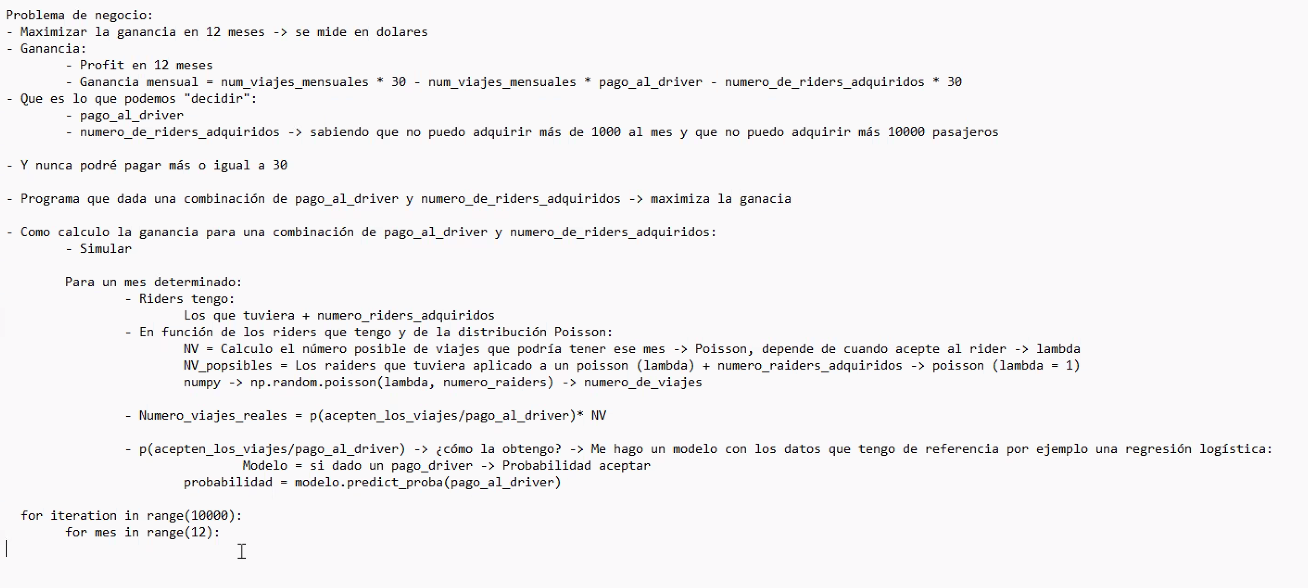

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.arima_model import ARIMAResults
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [3]:
df=pd.read_csv('data.csv')

In [4]:
df

,ID,PAY,ACCEPTED
0,786,27.352507,0
1,868,51.939040,1
2,846,24.451818,1
3,249,29.353959,1
4,434,20.568923,1
...,...,...,...
1295,579,25.306900,0
1296,871,36.827302,1
1297,209,20.824530,0
1298,165,26.291693,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        1300 non-null   int64  
 1   PAY       1300 non-null   float64
 2   ACCEPTED  1300 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 30.6 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,1300.0,497.563846,289.749383,1.0,249.000000,494.000000,744.000000,1000.000000
PAY,1300.0,26.626490,9.363111,0.0,20.801887,26.749334,33.348092,53.667563
ACCEPTED,1300.0,0.636154,0.481290,0.0,0.000000,1.000000,1.000000,1.000000


In [35]:
#excluyo los valores 0 en pay ya que no aportan informacion
df_1 = df[df['PAY'] != 0]

In [36]:
df_1.shape

(1294, 3)

In [37]:
#numero de viajes totales
viajes_totales = df_1['PAY'].count()
viajes_totales

1294

In [38]:
# pago medio a conductores
pago_medio = df_1['PAY'].mean()
pago_medio

26.74995159716842

In [39]:

def ganancias_mensuales(pago_medio, numero_viajes):
   
    ingresos = numero_viajes * 30  # Tasa de pago anual de 30 euros
    costos = np.sum(pago_medio) * numero_viajes  # Costos por viaje
    return (ingresos - costos)/12   

In [40]:
Ganancias_mensuales=ganancias_mensuales(pago_medio, viajes_totales)
Ganancias_totales=Ganancias_mensuales*12
print(f"Las ganancias totales son: {round(Ganancias_totales,2)}")
print(f"Las ganancias mensuales son: {round(Ganancias_mensuales,2)}")

Las ganancias totales son: 4205.56
Las ganancias mensuales son: 350.46


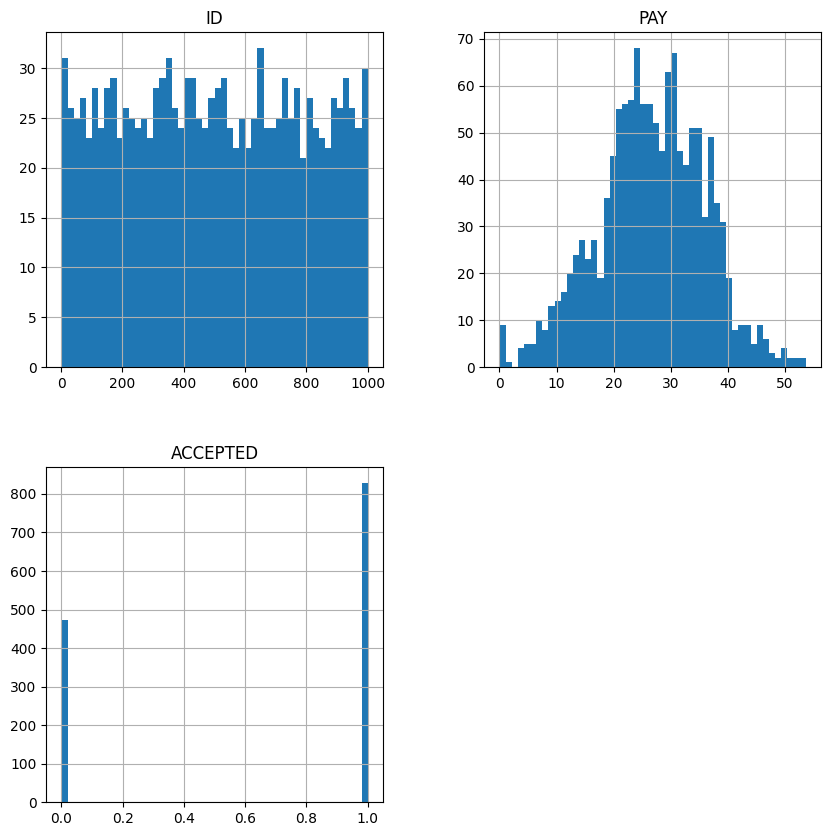

In [17]:
df.hist(figsize=(10,10), bins=50);

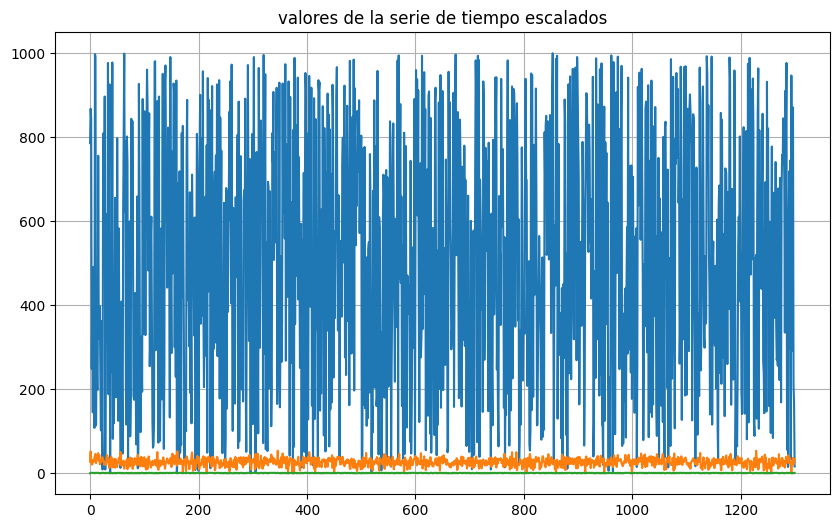

In [7]:
#graficamos la serie de tiempo sin escalar
plt.figure(figsize=(10,6))
plt.plot(df)
plt.title('valores de la serie de tiempo escalados')
plt.grid(True)
plt.show()

In [8]:
df.isna().sum()

ID          0
PAY         0
ACCEPTED    0
dtype: int64

In [9]:
#escalamos variables
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

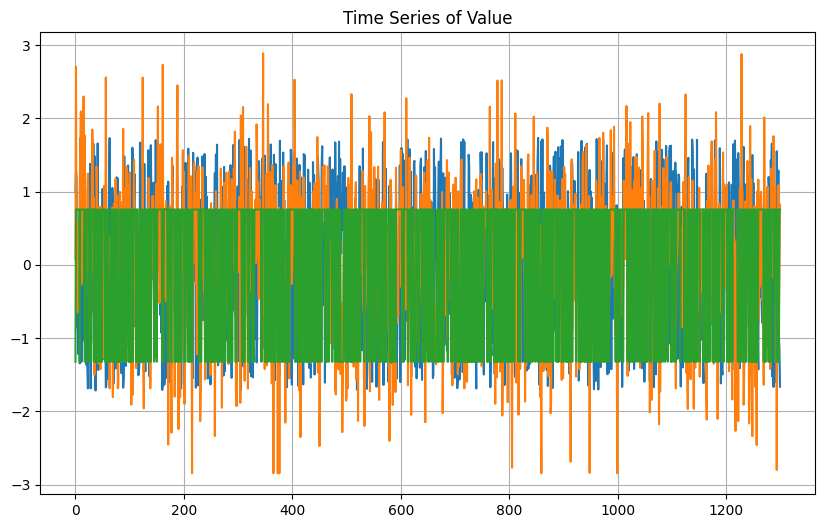

In [24]:
#graficamos la serie de tiempo
plt.figure(figsize=(10,6))
plt.plot(df_scaled)
plt.title('valores de la serie de tiempo escalados')
plt.grid(True)
plt.show()


Se muestra decreciente y con algo de rudio, pudien ser debido a varios factores

In [13]:
#entrenamos con auto-arima

modelo_arima_1 = auto_arima(df["PAY"],
                          m=12, #periodo de la estacionalidad elegido
                          seasonal=True, #hay estacionalidad
                          stepwise=True,#selecciona el mejor modelo 
                          trace=True)#periodo de la estacionalidad   

# Los mejores parámetros se almacenan en los atributos order y seasonal_order de modelo_arima
print(modelo_arima_1.order)
print(modelo_arima_1.seasonal_order)

# Entrenar el modelo ARIMA con los mejores parámetros
modelo_entrenado_1 = modelo_arima_1.fit(df["PAY"])



Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=9514.981, Time=4.34 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=9507.862, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=9511.209, Time=1.14 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=9511.215, Time=0.62 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=12375.650, Time=0.01 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=9509.317, Time=0.48 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=9509.327, Time=0.22 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=9511.264, Time=1.22 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=9509.724, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=9509.711, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[12] intercept   : AIC=9511.668, Time=0.20 sec

Best model:  ARIMA(0,0,0)(0,0,0)[12] intercept
Total fit time: 8.451 seconds
(0, 0, 0)
(0, 0, 0, 12)


In [21]:
best_model = ARIMA(df["PAY"], order=(1, 1, 1)).fit()
best_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    PAY   No. Observations:                 1300
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4752.281
Date:                Sun, 12 May 2024   AIC                           9510.562
Time:                        12:56:30   BIC                           9526.070
Sample:                             0   HQIC                          9516.381
                               - 1300                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0111      0.028      0.391      0.695      -0.044       0.067
ma.L1         -0.9999      0.085    -11.714      0.000      -1.167      -0.833
sigma2        87.6600      7.768     11.285      0.000      72.436     102.884
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 6.60
Prob(Q):                              0.93   Prob(JB):                         0.04
Heteroskedasticity (H):               0.96   Skew:                            -0.17
Prob(H) (two-sided):                  0.66   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [24]:
# Hacer predicciones del modelo 

predicciones_1 = modelo_entrenado_1.predict(n_periods=12)#hacemos predicciones a 12 meses en el futuro
mse = mean_squared_error(df["PAY"][len(df["PAY"]) - 12:], predicciones_1)
rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 85.8150154331741
RMSE: 9.263639426984088


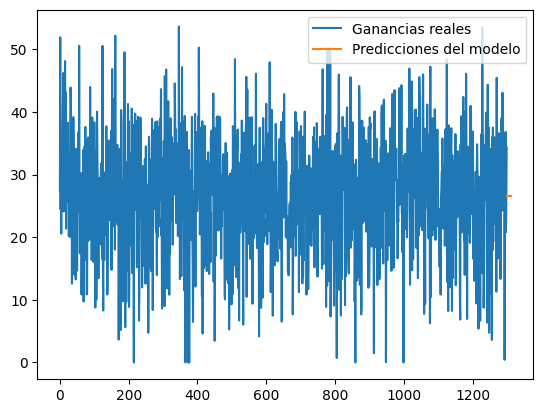

In [29]:
#visualizacion

plt.plot(df["PAY"], label="Ganancias reales")
plt.plot(predicciones_1, label="Predicciones del modelo")
plt.legend()
plt.show()


# simulacion de ganacias del negocio durante los proximos 12 meses

In [45]:
Ganancias_predichas_mensuales = Ganancias_mensuales + predicciones_1.sum()
print(f"Las ganancias predichas mensuales para el próximo año son: {round(Ganancias_predichas_mensuales,2)}")
ganancias_totales_predichas = Ganancias_predichas_mensuales * 12
print(f"Las ganancias predichas totales para el próximo año son: {round(ganancias_totales_predichas,2)}")


Las ganancias predichas mensuales para el próximo año son: 669.98
Las ganancias predichas totales para el próximo año son: 8039.78
